# 一、資料準備

In [1]:
import random
import pandas as pd
import numpy as np
import time

In [2]:
# 應該上班的小時
should_work_hr = 8
# 應該上班的分鐘
should_work_mm = 0
## 轉換為分鐘數
should_work_time = should_work_hr*60 + should_work_mm

##  部門
departments = ["行政", "業務"]

## 階級
levels = ["職員", "組長", "經理"]

## 資料筆數
size = 2000

# 手動產生資料

In [ ]:
attendance_list = []
for idx in range(size):
    actual_work_time = should_work_time + random.randint(0, 30)
    the_department = random.choice(departments)
    the_level = random.choice(levels)

    is_late = input(
        "id: %2d 部門： %s , 階級： %s  實際到達時間： %.2d : %.2d 是否遲到？（是輸入1，不是直接按Enter)" % (
            idx + 1,
            the_department,
            the_level,
            actual_work_time//60,
            actual_work_time - (actual_work_time//60)*60
        )
    )

    attendance_list.append([should_work_time,
                            actual_work_time,
                            the_department,
                            the_level,
                            is_late])
    
attendance_table = pd.DataFrame(attendance_list, columns=[
    'should_work_time',
    'actual_work_time',
    'departments',
    'levels',
    'is_late'])
attendance_table.to_csv('./attendance_table.csv', index=False)

id:  1 部門： 行政 , 階級： 組長  實際到達時間： 08 : 00 是否遲到？（是輸入1，不是直接按Enter)
id:  2 部門： 業務 , 階級： 職員  實際到達時間： 08 : 12 是否遲到？（是輸入1，不是直接按Enter)1
id:  3 部門： 業務 , 階級： 組長  實際到達時間： 08 : 19 是否遲到？（是輸入1，不是直接按Enter)


# 用規則產生資料

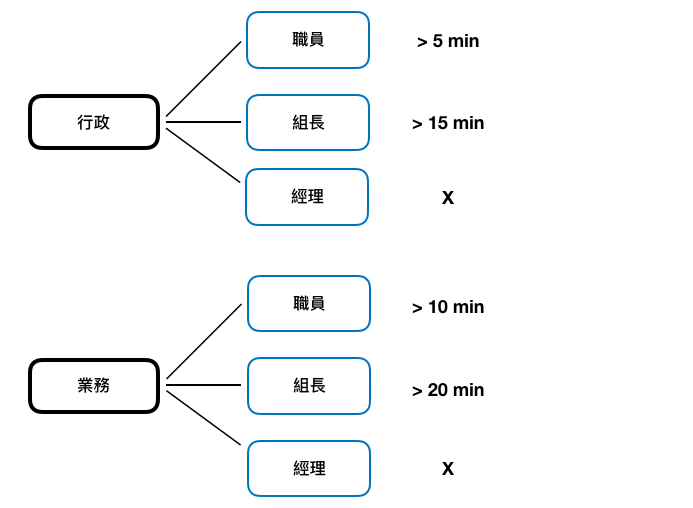

In [3]:
from IPython.display import Image
Image("./投影片/遲到系統判斷的設計.png")

In [4]:
attendance_list = []
for idx in range(size):
    actual_work_time = should_work_time + random.randint(0, 30)
    the_department = random.choice(departments)
    the_level = random.choice(levels)

    if the_department == '行政':
        if the_level == '職員' and actual_work_time - should_work_time > 5:
            is_late = "遲到"
        elif the_level == '組長' and actual_work_time - should_work_time > 15:
            is_late = "遲到"
        else:
            is_late = "沒事"
    else:
        if the_level == '職員' and actual_work_time - should_work_time > 10:
            is_late = "遲到"
        elif the_level == '組長' and actual_work_time - should_work_time > 20:
            is_late = "遲到"
        else:
            is_late = "沒事"        
        
        
    attendance_list.append([should_work_time,
                            actual_work_time,
                            the_department,
                            the_level,
                            is_late])
    
attendance_table = pd.DataFrame(attendance_list, columns=[
    'should_work_time',
    'actual_work_time',
    'departments',
    'levels',
    'is_late'])

In [5]:
attendance_table

,should_work_time,actual_work_time,departments,levels,is_late
0,480,508,行政,經理,沒事
1,480,510,行政,組長,遲到
2,480,492,業務,經理,沒事
3,480,492,行政,組長,沒事
4,480,494,行政,組長,沒事
5,480,485,行政,組長,沒事
6,480,487,行政,組長,沒事
7,480,486,業務,組長,沒事
8,480,481,業務,職員,沒事
9,480,497,行政,組長,遲到


# 查看遲到總數

In [6]:
attendance_table[attendance_table['is_late'] == '遲到'].shape

(742, 5)

# 二、資料前處理

In [7]:
class OneHotEncoder:
    def __init__(self, dropNa= True):
        self.dropNa = dropNa
    def fit(self, dataset):
        if self.dropNa:
            handle_data = dataset.dropna()
        else:
            handle_data = dataset
        self.category_name = dataset.name
        self.category_list = handle_data.drop_duplicates().values 

    def transform(self, dataset):
        def trans_one_hot(val):
            row = [0 for _ in range(len(self.category_list))]
            if pd.isna(val):
                row[np.where(pd.isna(self.category_list))[0][0]] = 1
            else:
                row[np.where(self.category_list == val)[0][0]] = 1
            return row
        if self.dropNa:
            handle_data = dataset.dropna()
        else:
            handle_data = dataset
        return pd.DataFrame([trans_one_hot(item) for item in handle_data]
                                         , columns=[
                                             "%s_%s"%(self.category_name, c_type) for c_type in self.category_list
                                         ])            

## 分割 訓練資料 跟 測試資料

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(attendance_table.drop('is_late', axis=1),
                                                    attendance_table[['is_late']],
                                                    test_size=0.3)

## 類別資料做 one hot encoding

In [10]:
departments_one_hot_encoder = OneHotEncoder()
departments_one_hot_encoder.fit( X_train['departments'])


levels_one_hot_encoder = OneHotEncoder()
levels_one_hot_encoder.fit( X_train['levels'])


is_late_one_hot_encoder = OneHotEncoder()
is_late_one_hot_encoder.fit( y_train['is_late'])

In [11]:
X_train_one_hot = departments_one_hot_encoder.transform(X_train['departments']) \
.join(
    levels_one_hot_encoder.transform(X_train['levels'])
     ).values

y_train_one_hot = is_late_one_hot_encoder.transform(y_train['is_late'])

In [12]:
X_train

,should_work_time,actual_work_time,departments,levels
1743,480,509,行政,經理
413,480,506,業務,組長
227,480,505,業務,經理
648,480,493,業務,職員
275,480,509,業務,職員
435,480,501,業務,職員
1332,480,495,業務,職員
448,480,503,行政,經理
1290,480,490,業務,職員
1006,480,502,業務,經理


In [13]:
X_train_one_hot

array([[1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 1, 0, 0],
       ...,
       [1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0],
       [1, 0, 0, 1, 0]], dtype=int64)

## 數值資料的正規化

In [18]:
from sklearn import preprocessing

numerical_standard_scaler  = preprocessing.StandardScaler()
numerical_standard_scaler.fit( X_train['actual_work_time'].values.reshape(-1, 1) )

X_train_numerical_standard = numerical_standard_scaler.transform(
    X_train['actual_work_time'].values.reshape(-1, 1)
)


# 最後把類別資料與數值資料水平合併
X_train_standard = np.hstack((X_train_numerical_standard, X_train_one_hot))

## 測試資料的轉換

In [19]:
X_test_one_hot = departments_one_hot_encoder.transform(X_test['departments']).join(
    levels_one_hot_encoder.transform(X_test['levels'])).values

y_test_one_hot = is_late_one_hot_encoder.transform(y_test['is_late'])


X_test_numerical_standard = numerical_standard_scaler.transform(
    X_test['actual_work_time'].values.reshape(-1, 1)
)

# 最後把類別資料與數值資料水平合併
X_test_standard = np.hstack((X_test_numerical_standard, X_test_one_hot))

In [20]:
X_train_standard[:5]

array([[ 1.54200895,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 1.20784469,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ],
       [ 1.0964566 ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ],
       [-0.24020046,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ],
       [ 1.54200895,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ]])

In [23]:
X_train_standard.shape[1]

6

# 三、建立模型

https://keras.io/

In [21]:
from tensorflow import keras

## 神經網絡層

In [25]:
model = keras.Sequential (
    [keras.layers.Dense(input_dim = X_train_standard.shape[1],
                        units=40,
                        kernel_initializer='normal',
                        activation= 'sigmoid'
                        ),
     keras. layers.Dense(units=30,
                        kernel_initializer='normal',
                        activation= 'sigmoid'),
     keras. layers.Dense(units=2,
                        kernel_initializer='normal', 
                        activation= 'softmax')]
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                280       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 62        
Total params: 1,572
Trainable params: 1,572
Non-trainable params: 0
_________________________________________________________________


## 定義訓練方式

In [27]:
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy']
             )## 定義訓練方式

## 開始訓練模型

In [28]:
training_history = model.fit(x = X_train_standard,
                             y = y_train_one_hot.values,
                             batch_size = 20,
                             epochs = 50,
                             validation_data =( X_test_standard,
                                                y_test_one_hot.values)
                             )

Train on 1400 samples, validate on 600 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
1400/1400 [==============================] - 0s 109us/sample - loss: 0.6692 - acc: 0.5950 - val_loss: 0.6548 - val_acc: 0.6317
Epoch 2/50
1400/1400 [==============================] - 0s 43us/sample - loss: 0.6540 - acc: 0.6279 - val_loss: 0.6465 - val_acc: 0.6317
Epoch 3/50
1400/1400 [==============================] - 0s 43us/sample - loss: 0.6389 - acc: 0.6279 - val_loss: 0.6221 - val_acc: 0.6317
Epoch 4/50
1400/1400 [==============================] - 0s 42us/sample - loss: 0.5942 - acc: 0.6307 - val_loss: 0.5523 - val_acc: 0.6700
Epoch 5/50
1400/1400 [==============================] - 0s 40us/sample - loss: 0.4878 - acc: 0.7936 - val_loss: 0.4135 - val_acc: 0.8650
Epoch 6/50
1400/1400 [==============================] - 0s 43us/sample - loss: 0.3408 - acc: 0.9186 - val_loss: 0.2743 - val_acc: 0.9467
Epoch 7/50
1400/1400 [==============

## 訓練結果

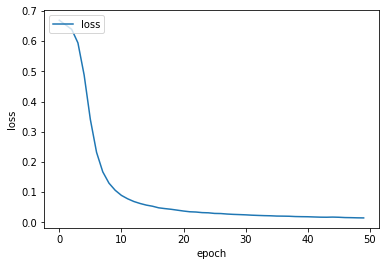

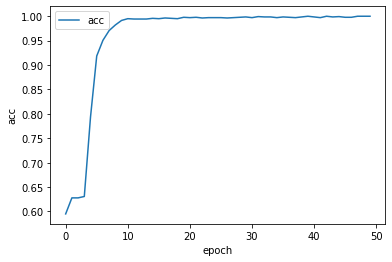

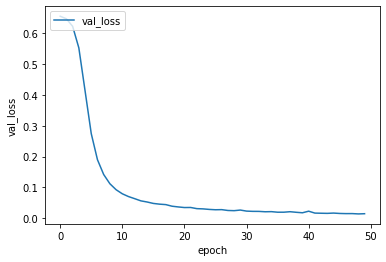

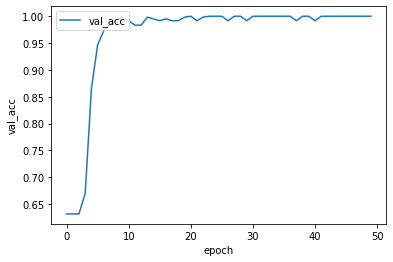

In [30]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

for training_key in training_history.history.keys():
    plt.plot(training_history.history[training_key], label = training_key)
    plt.ylabel(training_key)
    plt.xlabel('epoch')
    plt.legend([training_key], loc='upper left')
    plt.show()

# 四、模型評估

In [46]:
the_department = input("部門：1 => 行政 ， 2 => 業務     ")
the_department = "行政" if the_department == "1" else  "業務"
the_level = input("階級：1 => 職員 ， 2 => 組長 ， 3 => 經理      ")
the_level = "職員" if the_level == "1" else  "組長" if the_level == "2" else "經理"

actual_work_hr = input("實際上班的時間（小時）")
actual_work_mm = input("實際上班的時間（分鐘）")
actual_work_time = int(actual_work_hr)*60 + int(actual_work_mm)

部門：1 => 行政 ， 2 => 業務     2
階級：1 => 職員 ， 2 => 組長 ， 3 => 經理      3
實際上班的時間（小時）9
實際上班的時間（分鐘）0


In [47]:
real_data = pd.DataFrame([{'actual_work_time' : actual_work_time, 
               'departments' : the_department,
               'levels' : the_level}])

### 資料前處理
real_data_input = np.hstack((numerical_standard_scaler.transform(real_data['actual_work_time'].values.reshape(-1, 1)),
                             departments_one_hot_encoder.transform(real_data['departments']).join(
                                 levels_one_hot_encoder.transform(real_data['levels'])).values))

In [48]:
y_pred = model.predict(real_data_input)

In [49]:
for prediction_idx, prediction in enumerate(y_pred.squeeze()):
    print("%4s 的機率  %.4f "%(is_late_one_hot_encoder.category_list[prediction_idx], prediction))

  沒事 的機率  0.0000 
  遲到 的機率  1.0000 


In [40]:
is_late_one_hot_encoder.category_list

array(['沒事', '遲到'], dtype=object)

In [45]:
training_history = model.fit(x = real_data_input,
                             y = np.array([[1, 0]]),
                            epochs = 20)

Epoch 1/20
1/1 [==============================] - 0s 998us/sample - loss: 0.0391 - acc: 1.0000
Epoch 2/20
1/1 [==============================] - 0s 0s/sample - loss: 0.0197 - acc: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 998us/sample - loss: 0.0106 - acc: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 0s/sample - loss: 0.0061 - acc: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 0s/sample - loss: 0.0038 - acc: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 0s/sample - loss: 0.0025 - acc: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 997us/sample - loss: 0.0017 - acc: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 997us/sample - loss: 0.0012 - acc: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 998us/sample - loss: 9.1150e-04 - acc: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 0s/sample - loss: 7.0478e-04 - acc: 1.0000
Epoch 11/20
1/1 [==============================] - 0s 0s